In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rizalr","key":"8618ee8146b245910350d87c95b76e45"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d nancyalaswad90/diamonds-prices

100% 711k/711k [00:00<00:00, 990kB/s]
100% 711k/711k [00:00<00:00, 989kB/s]


In [4]:
!unzip diamonds-prices.zip -d diamonds_prices
!ls diamonds_prices

Archive:  diamonds-prices.zip
  inflating: diamonds_prices/Diamonds Prices2022.csv  
'Diamonds Prices2022.csv'


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("diamonds_prices/Diamonds Prices2022.csv")

In [7]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [9]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,26972.000000,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,15572.147122,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13486.500000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26972.000000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40457.500000,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,53943.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [11]:
df = df.drop('Unnamed: 0', axis=1)

In [12]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [14]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [16]:
df["color"].value_counts()

G    11292
E     9799
F     9543
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [17]:
df["cut"].value_counts()

Ideal        21551
Premium      13793
Very Good    12083
Good          4906
Fair          1610
Name: cut, dtype: int64

In [18]:
df["clarity"].value_counts()

SI1     13067
VS2     12259
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [22]:
df[df.duplicated()]

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17
52861,0.50,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [23]:
df.drop_duplicates(inplace=True)

<Axes: >

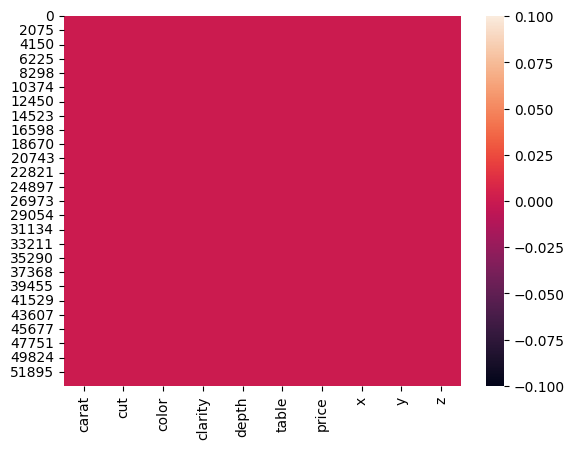

In [24]:
sns.heatmap(df.isnull())

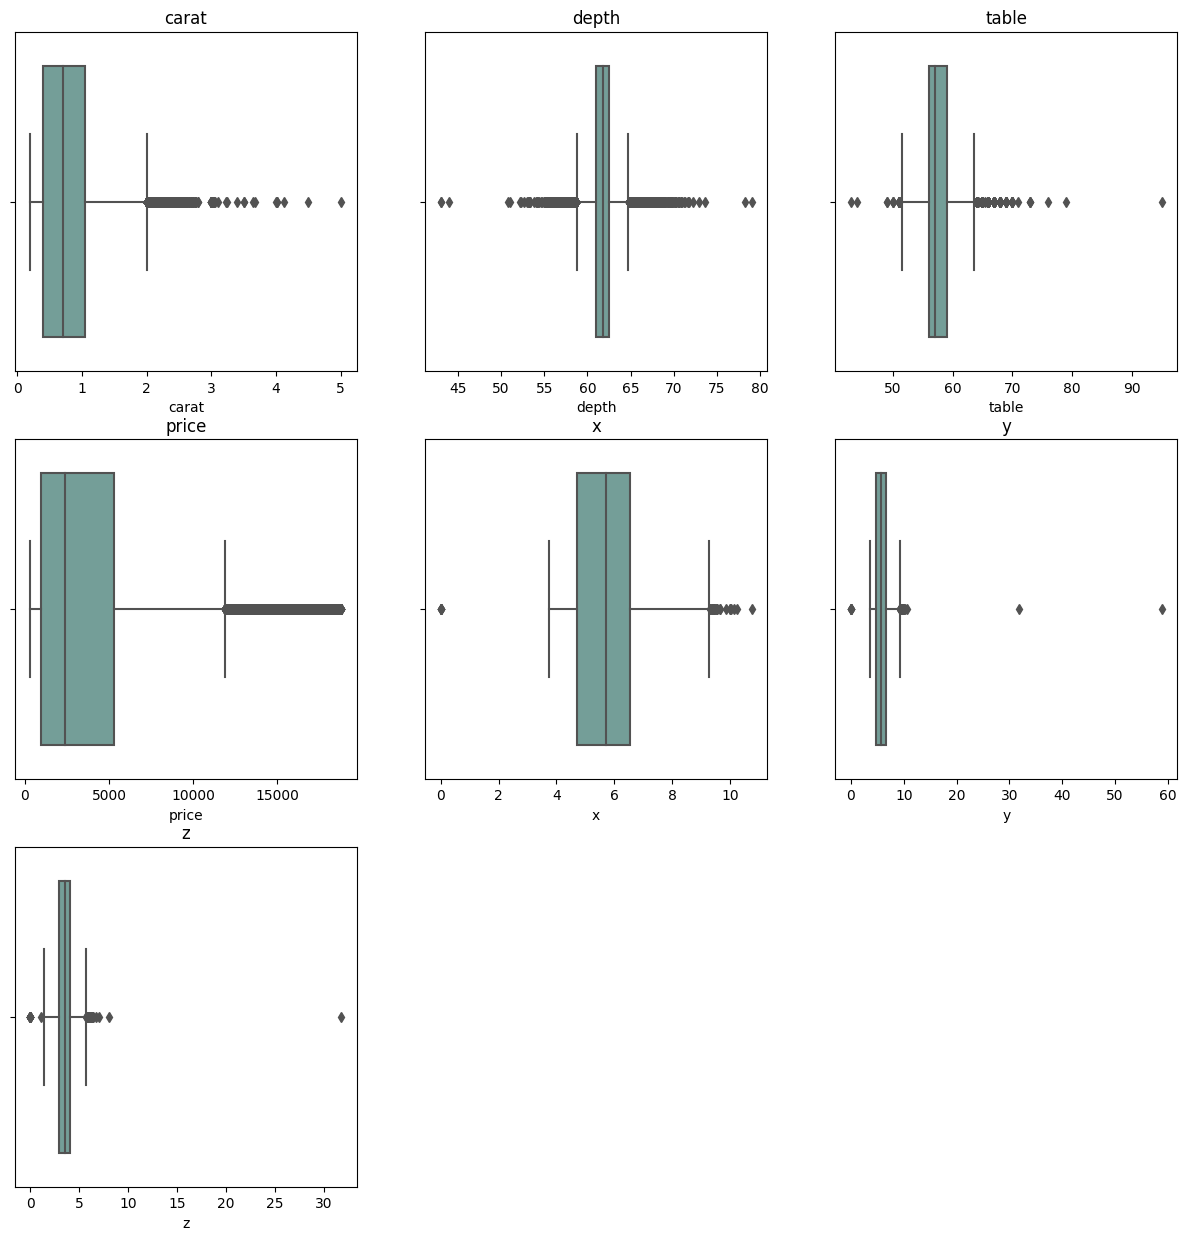

In [26]:
numeric_cols = ['carat', 'depth','table', 'price', 'x', 'y', 'z']
plt.figure(figsize=(15, 15))
for i in range(7) :
    plt.subplot(3,3,i+1)

    sns.boxplot(x=df[numeric_cols[i]],color='#6DA59D')
    plt.title(numeric_cols[i])
plt.show()

In [27]:
def detect_outliers(data,column):
    q1 = df[column].quantile(.25)
    q3= df[column].quantile(.75)
    IQR = q3-q1

    lower_bound = q1 - (1.5*IQR)
    upper_bound = q3 + (1.5*IQR)

    ls = df.index[(df[column] <lower_bound) | (df[column] > upper_bound)]

    return ls

In [28]:
index_list = []

for column in numeric_cols:
    index_list.extend(detect_outliers(df,column))

# remove duplicated indices in the index_list and sort it
index_list = sorted(set(index_list))

In [29]:
df =df.drop(index_list)
after_remove = df.shape

print(f'Shape of data after remove : {after_remove}')

Shape of data after remove : (47416, 10)


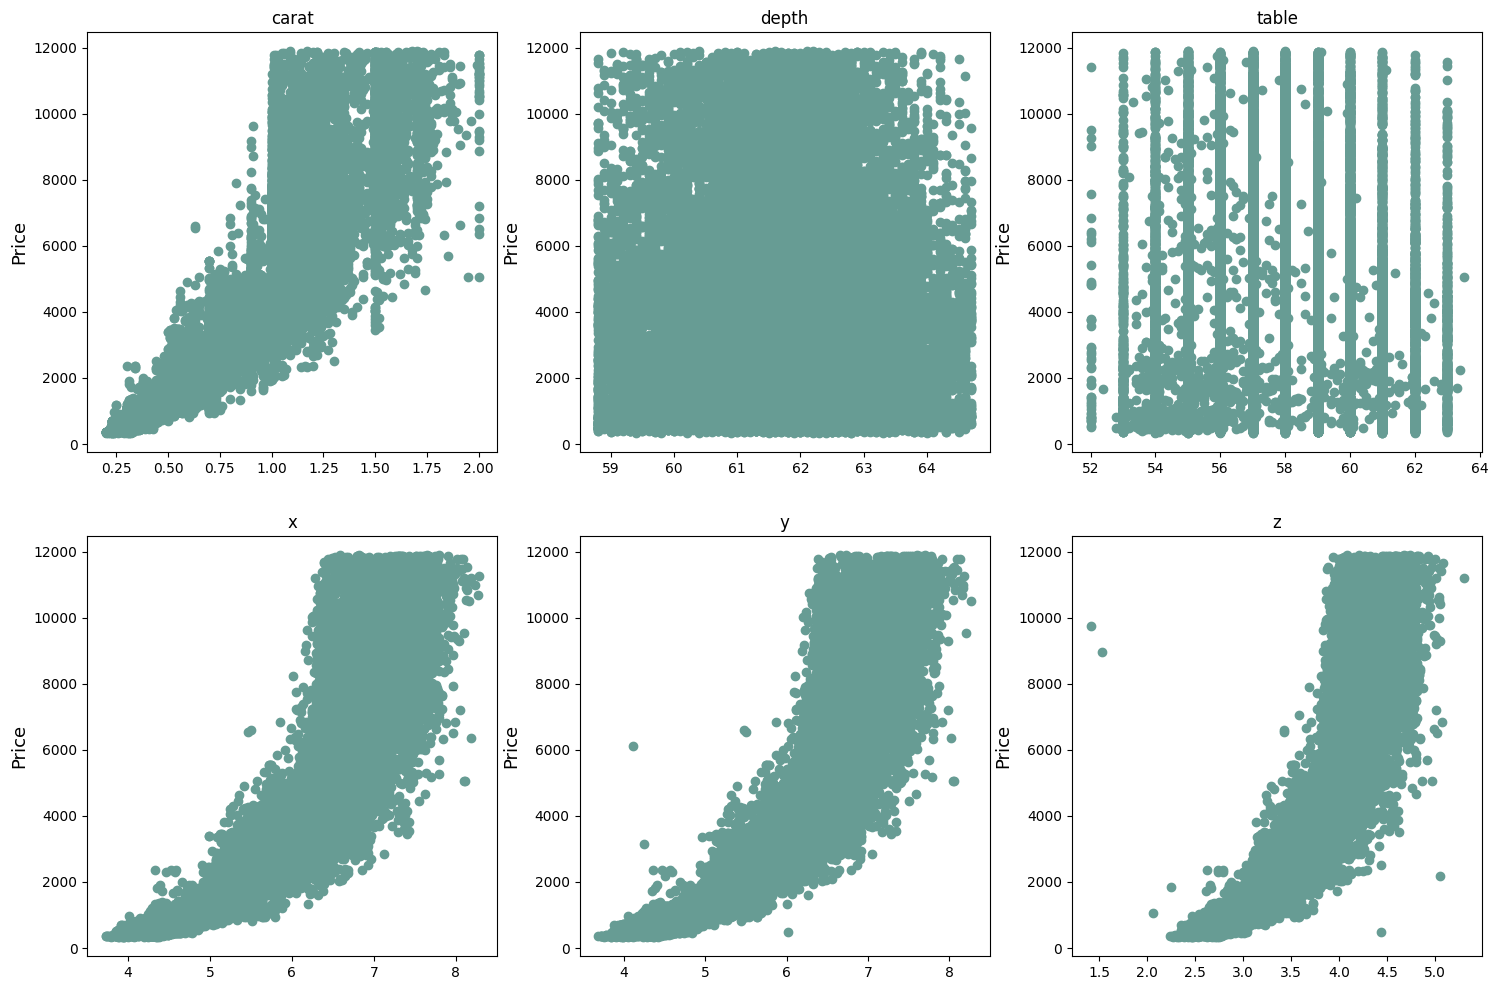

In [31]:
cols = ['carat', 'depth','table', 'x', 'y', 'z']
plt.figure(figsize=(18, 12))
for i in range(6) :
    plt.subplot(2,3,i+1)
    #sns.set()
    plt.scatter(df[cols[i]],df['price'],color='#679C94')
    plt.title(cols[i])
    plt.ylabel('Price',size=13)
plt.show()

In [34]:
kualitas = df.groupby('cut').mean().sort_values('price',ascending=False)
kualitas = kualitas[['price']].round(2)
kualitas.reset_index(inplace=True)
kualitas

<ipython-input-34-23b950f01d43>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  kualitas = df.groupby('cut').mean().sort_values('price',ascending=False)


,cut,price
0,Fair,3701.98
1,Premium,3485.01
2,Very Good,3222.78
3,Good,3215.51
4,Ideal,2801.71


<ipython-input-35-900cddbbcf17>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True,cmap='bone')


<Axes: >

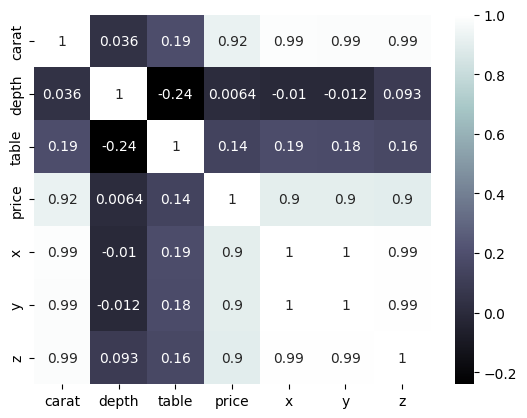

In [35]:
sns.heatmap(df.corr(),annot = True,cmap='bone')

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [38]:
df['cut'] = df['cut'].map({'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4})
df['color'] = df['color'].map({'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6})
df['clarity'] = df['clarity'].map({'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7})

In [39]:
x=df[['carat', 'cut', 'color', 'clarity',
       'x', 'y', 'z']]
y=df[['price']]

In [42]:
scaler = StandardScaler()
x= scaler.fit_transform(x)

In [43]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=.2,shuffle=True)

In [44]:
model = LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

In [45]:
y_pred = model.predict(x_test)

In [48]:
print(f''' Akurasi Train : {r2_score(y_train,model.predict(x_train))}
Akurasi Test : {r2_score(y_test , y_pred)}''')

 Akurasi Train : 0.9143737793698357
Akurasi Test : 0.9146849789150686


In [51]:
data = np.array([[2, 2, 3, 3, 5, 5, 3]])

In [52]:
prediksi = model.predict(data)
print('Estimasi harga Berlian : ', prediksi)

Estimasi harga Berlian :  [[10014.26488655]]


In [53]:
import pickle

filename = "estimasi_harga_berlian.sav"
pickle.dump(model,open(filename,'wb'))